In [72]:
# Code for finite differencing. 

%matplotlib notebook
from numpy import *
from matplotlib import *
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

In [73]:
#Finite difference code for second derivative
def d2u_FD(u, dh):
    ng = size(u[1,:]);
    
    dder = zeros_like(u);
    
    for i in range (1, ng-1):
        for j in range (1, ng-1):
            dder[i][j] = (u[i+1,j] + u[i-1,j] + u[i,j+1] + u[i,j-1] - 4*u[i,j])/(dh*dh);
    
    return dder;

In [74]:
# Compact Finite difference code for second derivative
def d2u_CFD(u,dh):
    ng = size(u[1,:]);
    
    dder = zeros_like(u);
    ddx  = zeros_like(u);
    ddy  = zeros_like(u);
    
    A = zeros((ng,ng)); bx = zeros(ng); by = zeros(ng);

    #Evaluate d2u/dx2
    for i in range (1, ng-1):
        A[0,0] = 1; A[-1,-1] = 1;
        for j in range (1, ng-1):
            A[j][j-1:j+2] = [0.1, 1.0, 0.1];
            bx[j] = 1.2/(dh*dh)*(u[i-1,j]-2*u[i,j]+u[i+1,j]);
        Ainv = linalg.inv(A);
        ddx[i,:] = Ainv.dot(bx);

    #print(A);

    #Evaluate d2u/dy2
    for j in range (1, ng-1):
        A[0,0] = 1; A[-1,-1] = 1;
        for i in range (1, ng-1):
            A[i][i-1:i+2] = [0.1, 1.0, 0.1];
            by[i] = 1.2/(dh*dh)*(u[i-1,j]-2*u[i,j]+u[i+1,j]);
        Ainv = linalg.inv(A);
        ddy[:,j] = Ainv.dot(by);

    #print(d2ux);
    dder = ddx + ddy;
    
    return dder;

In [92]:
# Main part of code:
ng = 6; nref = 4
Xmin = 0.0; Xmax = 1.0;
Ymin = 0.0; Ymax = 1.0;

dx     = zeros(nref);
ErrFD  = zeros(nref);
ErrCFD = zeros(nref);

for ref in range (nref):
    
    dh = (Xmax-Xmin)/(ng-1);
    dx[ref] = dh

    x = arange(Xmin, Xmax+dh, dh);
    y = arange(Ymin, Ymax+dh, dh);

    u = zeros((ng,ng));
    dduFD  = zeros_like(u);
    dduCFD = zeros_like(u);
    d2uex = zeros_like(u);

    #Define u
    for i in range (ng):
        for j in range (ng):
            u[i,j] = sin(2*pi*x[i])*sin(2*pi*y[j]);

    dduFD = d2u_FD(u,dh);
    dduCFD = d2u_CFD(u,dh);
    
    #Error analysis:
    for i in range (1,ng-1):
        for j in range (1, ng-1):
            d2uex[i,j] = -8*pi**2*sin(2*pi*x[i])*sin(2*pi*y[j]);
            ErrFD[ref] = ErrFD[ref] + (d2uex[i,j]-dduFD[i,j])**2;
            ErrCFD[ref] = ErrCFD[ref] + (d2uex[i,j]-dduCFD[i,j])**2;

    ErrFD[ref]  = (ErrFD[ref]/(ng-1)**2)**0.5;
    ErrCFD[ref] = (ErrCFD[ref]/(ng-1)**2)**0.5;
    
    #print('')
    #print('Error norms for ng:', ng)
    #print('Finite difference:', ErrFD[ref]);
    #print('Compact Finite difference:', ErrCFD[ref]);
    
    ng = (ng-1)*2 + 1;


Error norms for ng: 6
Finite difference: 4.9292673231
Compact Finite difference: 0.43260141896

Error norms for ng: 11
Finite difference: 1.28181647935
Compact Finite difference: 0.0260271272793

Error norms for ng: 21
Finite difference: 0.32363064048
Compact Finite difference: 0.0016085470107

Error norms for ng: 41
Finite difference: 0.0811075087982
Compact Finite difference: 0.000100242592315


<IPython.core.display.Javascript object>


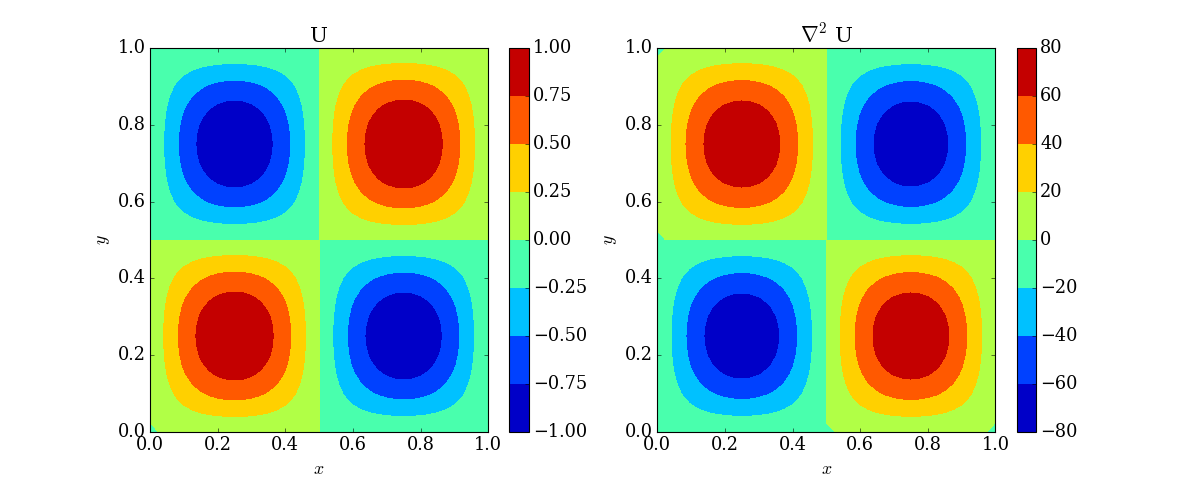

In [96]:
pyplot.figure(figsize=(15,6))

pyplot.subplot(121)
pyplot.contourf(x,y,u)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title('U')
pyplot.colorbar();

pyplot.subplot(122)
pyplot.contourf(x,y,d2uex)
pyplot.xlabel('$x$')
pyplot.ylabel('$y$')
pyplot.title(r"$\nabla^{2}$ U")
pyplot.colorbar();

<IPython.core.display.Javascript object>


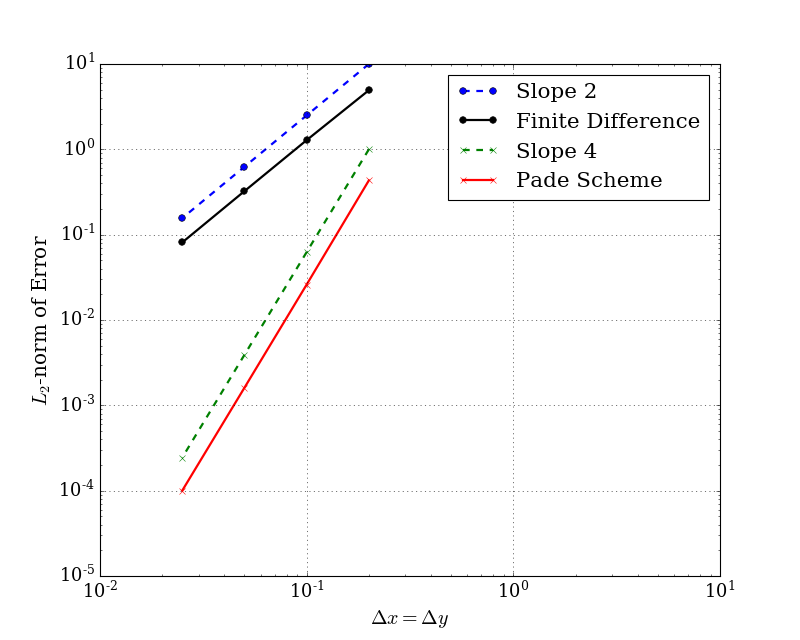

In [94]:
#Define two lines for indicating slopes
slope2 = [10, 2.5, 0.625, 0.15625];
slope4 = [1, 0.0625, 0.00390625, 0.00024414062];

# plot using the matplotlib function loglog()
pyplot.figure(figsize=(10,8))
pyplot.grid(True)
pyplot.xlabel(r'$\Delta x = \Delta y$', fontsize=18)
pyplot.ylabel(r'$L_2$-norm of Error', fontsize=18)
pyplot.loglog(dx[:], slope2, color='b', ls='--', lw=2, marker='o', label = 'Slope 2');
pyplot.loglog(dx[:], ErrFD[:], color='k', ls='-', lw=2, marker='o', label = 'Finite Difference');
pyplot.loglog(dx[:], slope4, color='g', ls='--', lw=2, marker='x', label = 'Slope 4');
pyplot.loglog(dx[:], ErrCFD[:], color='r', ls='-', lw=2, marker='x', label = 'Pade Scheme');
pyplot.xlim(1e-2,10);
pyplot.ylim(1e-5,10);
pyplot.legend();

'\\Delta,\\ \\Gamma,\\ \\Omega,\\ \\Phi,\\ \\Pi,\\ \\Upsilon,\\ \\nabla,\\ '